# Regularization

Overfitting, also known as High Variance, occurs when a model learns the training data too well but fail to generalize to new data. 

## Regularization Techniques

#### Regularization refers to a set of different techniques that lower the complexity of a neural network model during training, and thus minimize/prevent the overfitting.

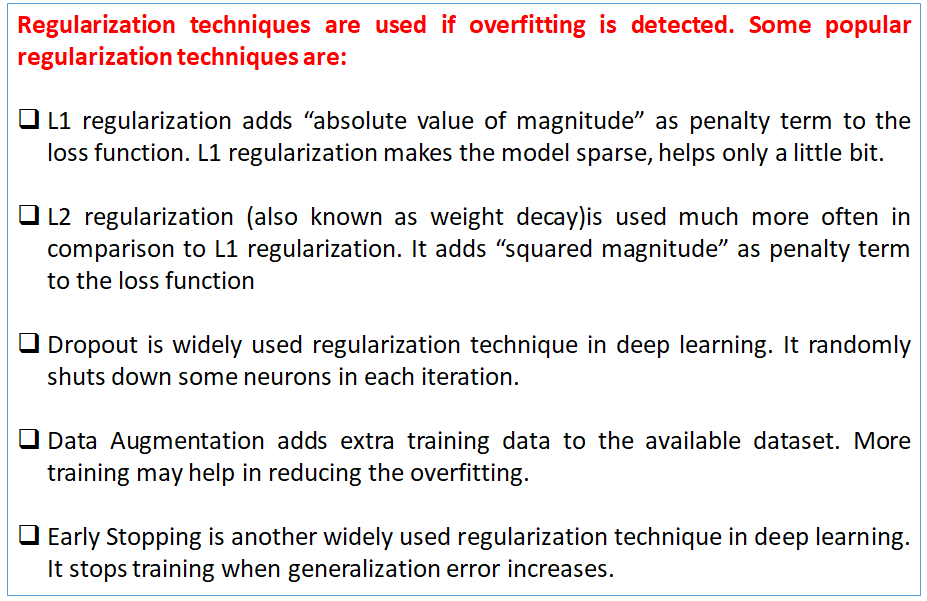

### Importing the useful files

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Exploring data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


## 1. Build an unregularized neural network model

1. Build an unregularized neural network model

Before applying regularization, let’s build a neural network without regularization and take a look at the overfitting issue.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## def create_model(): 
model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    ## return model

    The first layer (also known as the input layer) has the input_shape to set the input size (4,)
    The input layer has 64 units, followed by 3 dense layers, each with 128 units. 
    Then there are further 3 dense layers, each with 64 units. 
    All these layers use the ReLU activation function.
    The output Dense layer has 3 units and the softmax activation function.

In [10]:
##model = model_1
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

1.1 Training a model

In order to train a model, we first have to configure our model using compile() and pass the following arguments:

    Use Adam (adam) optimization algorithm as the optimizer
    Use categorical cross-entropy loss function (categorical_crossentropy) for our multiple-class classification problem
    For simplicity, use accuracy as our evaluation metrics to evaluate the model during training and testing.

### Compile the model


In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

### Fit the model to the training data

In [12]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 6s - loss: 1.0982 - accuracy: 0.4444 - val_loss: 1.0578 - val_accuracy: 0.6333 - 6s/epoch - 2s/step
Epoch 2/200
3/3 - 0s - loss: 1.0390 - accuracy: 0.7000 - val_loss: 1.0063 - val_accuracy: 0.6333 - 40ms/epoch - 13ms/step
Epoch 3/200
3/3 - 0s - loss: 0.9795 - accuracy: 0.7000 - val_loss: 0.9385 - val_accuracy: 0.6333 - 38ms/epoch - 13ms/step
Epoch 4/200
3/3 - 0s - loss: 0.9018 - accuracy: 0.7000 - val_loss: 0.8414 - val_accuracy: 0.6333 - 38ms/epoch - 13ms/step
Epoch 5/200
3/3 - 0s - loss: 0.7946 - accuracy: 0.7000 - val_loss: 0.7156 - val_accuracy: 0.6333 - 40ms/epoch - 13ms/step
Epoch 6/200
3/3 - 0s - loss: 0.6663 - accuracy: 0.7000 - val_loss: 0.6065 - val_accuracy: 0.6333 - 39ms/epoch - 13ms/step
Epoch 7/200
3/3 - 0s - loss: 0.5448 - accuracy: 0.7000 - val_loss: 0.4760 - val_accuracy: 0.7333 - 40ms/epoch - 13ms/step
Epoch 8/200
3/3 - 0s - loss: 0.4281 - accuracy: 0.8111 - val_loss: 0.3769 - val_accuracy: 0.9667 - 37ms/epoch - 12ms/step
Epoch 9/200
3/3 - 0s - loss:

### Model Evaluation

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

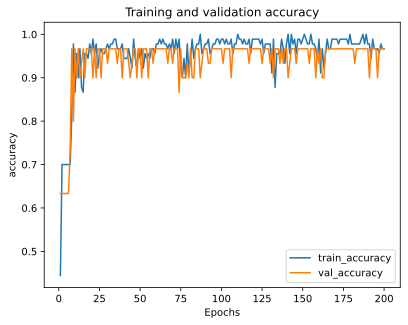

In [14]:
plot_metric(history, 'accuracy')

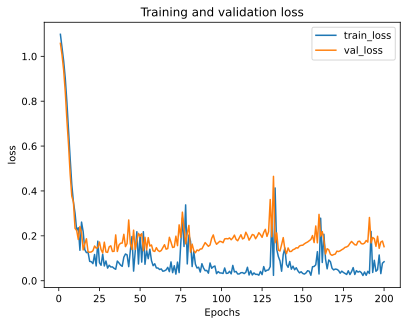

In [15]:
plot_metric(history, 'loss')

### Plot the training and validation loss

plotting the loss vs. epochs graph on the training and validation sets
From the graph, it can be seen that the model has vastly overfitted the training data, so it outperform the validation set

In [16]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0126 - accuracy: 1.0000 - 22ms/epoch - 22ms/step


[0.012588238343596458, 1.0]

## 2. Adding L2 regularization and Dropout

## Import Dropout and L2 regularization from TensorFlow Keras package

Create a function called create_regularized_model() that will return a model similar to the one we built before. 
However, L2 regularization and Dropout layers are added.
The function will take 2 arguments: a L2 regularization factor and a Dropout rate.

    Add L2 regularization in all layers except the output layer [1].
    Add Dropout layer between every two dense layers.

In [17]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

def create_regularized_model(factor, rate):
    model = Sequential([
        Dense(64, kernel_regularizer=l2(factor), activation="relu", input_shape=(4,)),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(64, kernel_regularizer=l2(factor), activation="relu"),
        Dropout(rate),
        Dense(3, activation='softmax')
    ])
    return model

In [18]:
# Re-build the model with weight decay and dropout layers
model = create_regularized_model(1e-5, 0.3)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 128)              

In [20]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
# Train the model, with some of the data reserved for validation
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 4s - loss: 1.2067 - accuracy: 0.3667 - val_loss: 1.0707 - val_accuracy: 0.6333 - 4s/epoch - 1s/step
Epoch 2/200
3/3 - 0s - loss: 1.2461 - accuracy: 0.2556 - val_loss: 1.0724 - val_accuracy: 0.6667 - 71ms/epoch - 24ms/step
Epoch 3/200
3/3 - 0s - loss: 1.1298 - accuracy: 0.3778 - val_loss: 1.0672 - val_accuracy: 0.5667 - 56ms/epoch - 19ms/step
Epoch 4/200
3/3 - 0s - loss: 1.1476 - accuracy: 0.4000 - val_loss: 1.0616 - val_accuracy: 0.5333 - 76ms/epoch - 25ms/step
Epoch 5/200
3/3 - 0s - loss: 1.0735 - accuracy: 0.4111 - val_loss: 1.0558 - val_accuracy: 0.6000 - 48ms/epoch - 16ms/step
Epoch 6/200
3/3 - 0s - loss: 1.0664 - accuracy: 0.4000 - val_loss: 1.0487 - val_accuracy: 0.7000 - 39ms/epoch - 13ms/step
Epoch 7/200
3/3 - 0s - loss: 1.1413 - accuracy: 0.2889 - val_loss: 1.0444 - val_accuracy: 0.5333 - 42ms/epoch - 14ms/step
Epoch 8/200
3/3 - 0s - loss: 1.0732 - accuracy: 0.4222 - val_loss: 1.0470 - val_accuracy: 0.6000 - 39ms/epoch - 13ms/step
Epoch 9/200
3/3 - 0s - loss:

### Plot the learning curves

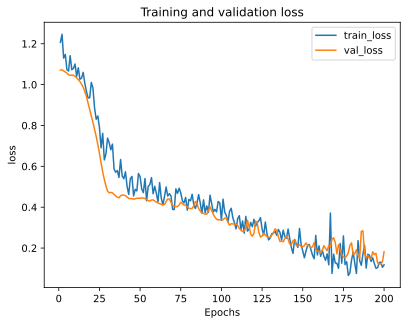

In [22]:
plot_metric(history, 'loss')

Here, you can see that the overfitting is not completely fixed, but there is a signficant improvement when we compare it to the unregularized model

In [23]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0928 - accuracy: 0.9667 - 22ms/epoch - 22ms/step


[0.0927637368440628, 0.9666666388511658]